https://www.pyimagesearch.com/2014/05/26/opencv-python-k-means-color-clustering/

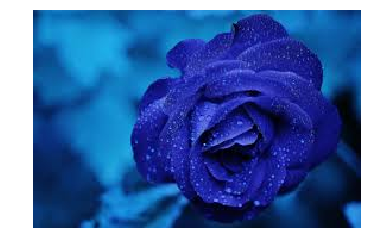

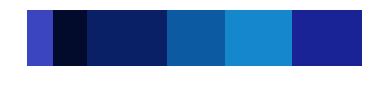

In [4]:
# import the necessary packages
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist

def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar



# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib
image = cv2.imread("img1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3))

# cluster the pixel intensities
clt = KMeans(n_clusters = 6)
clt.fit(image)

# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)

# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [11]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

class ImageFilter():
    
    def __init__(self,fl_name,k):
        
        self.image = cv2.imread(fl_name)
        self.shape = self.image.shape
        self.k = k
        self.points = {}
        
        
    def fit(self):
        
        self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        # show our image
        plt.figure()
        plt.axis("off")
        plt.imshow(self.image)

        # # reshape the image to be a list of pixels
        self.image = self.image.reshape((self.image.shape[0] * self.image.shape[1], 3))

        # cluster the pixel intensities
        self.clt = KMeans(n_clusters = self.k)
        self.clt.fit(self.image)

       
        centers = [tuple(i) for i in self.clt.cluster_centers_]

        for i in range(self.clt.n_clusters):
            self.points[centers[i]] = np.where(self.clt.labels_==i)[0]


        for c in self.points:
            self.image[self.points[c]] = c

        self.image = self.image.reshape((self.shape[0], self.shape[1], 3))

    def show(self):
        plt.imshow(self.image)
        
    def get(self):
        return(self.image)

In [15]:
new_img = ImageFilter('dog.jpg',4)

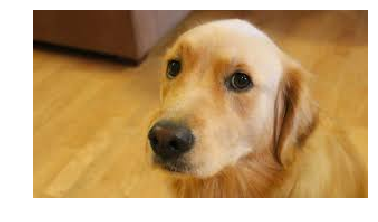

In [16]:
new_img.fit()

In [31]:
new_img2 = ImageFilter("dog2.jpg",3)

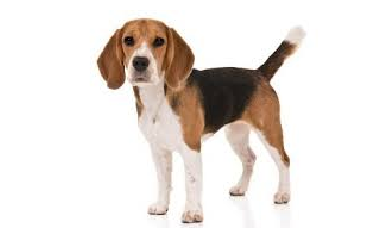

In [32]:
new_img2.fit()

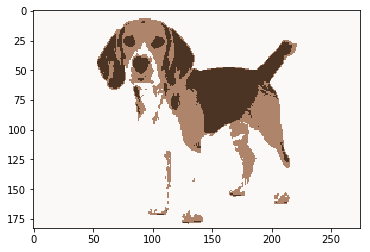

In [33]:
new_img2.show()

# classes

In [22]:
class Student:
    'this cretes stufeaskdl'
    
    def __init__(self,name):
        self.name = name

In [27]:
st1 = Student('sam')

st2 = Student('rambo')

In [25]:
st1.name

'sam'

In [26]:
new_img.k

4